# PICASSO'S - BUT FOR BOOKS

## Business Understanding

### 1.1 Overview
Books are one of the greatest invention of the humankind and the ability to transfer knowledge to a wider audience traversing timezones and even generations..

### 1.2 Problem Statement
However, one of the biggest drawbacks of finishing a good book is the tormentous hunt to find another book that was just as good, entertaining or as informative. Searching and scouring the internet for a good book could lead to insanity (not proven yet).

### 1.3 Proposed Solution
Designing a bespoke recommendation system could fix this issue post-haste. The recommendations would provide a number of suggestion based on your current read - leading to excitement and will to live even longer.

### 1.4 Objective
The main objective of this project is to create a Recommendation System - collaborative filtering recommendation system specifically - to create an array of interesting suggestions based on the user's input.

* We could create a model that predicts your next read
* Or predict your next author

**Specific Objectives**
* To investigate the Authors with the highest readership and popularity
* To investigate the Publishers churning the highest number of books
* Investigate the Books with the highest readership

## 2.0 Data Understanding

The data was sourced from Kaggle. 

There are 3 csv files containing the 
* Books Dataset
* Users Dataset
* Ratings Dataset

The columns in the **Books Dataset** include:
<ol>
    <li>Book-Author</li>
    <li>Book-Title</li>
    <li>ISBN</li>
    <li>Image-URL-L</li>
    <li>Image-URL-M</li>
    <li>Image-URL-S</li>
    <li>Publisher</li>
    <li>Year-Of-Publication</li>
</ol>

The columns in the **Users Dataset** are:
<ol>
    <li>Age</li>
    <li>Location</li>
    <li>User-ID</li>
</ol>

The columns in the **Ratings Dataset** are:
<ol>
    <li>Book-Rating</li>
    <li>ISBN</li>
    <li>User-ID</li>
</ol>

In [2]:
# Data Exploration
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Scipy Sparse
from scipy.sparse import csr_matrix

# Modelling
from sklearn.neighbors import NearestNeighbors

# Pickle
import pickle

### 2.1 Data

The class below can load the data and return a dataframe. A dataframe can also be provided.

The class can also give some information about the dataset to give an understanding of the data.

In [1]:
class DataUnderstading:
    def __init__(self, name, df='None'):
        self.df = df
        self.name = name
        
    def load_data(self, path):
        if self.df == 'None':
            self.df = pd.read_csv(path, sep=';', encoding='latin-1', on_bad_lines='skip', low_memory=False)
            self.df.head()
            
        return self.df
    
    def understanding(self):
        # Shape and Columns
        print(f"DATA UNDERSTANDING OF THE {self.name} Dataset")
        print("\n\nSHAPE")
        print(f"The {self.name} dataset contains {self.df.shape[0]:,} records and {self.df.shape[1]} columns")
        print(f"The columns are { [str(col) for col in sorted(self.df.columns)] }")
        
        # Missing values 
        print("\n\nMISSING VALUES")
        print(f"Missing values in the {self.name} dataset:")
        print(f"{self.df.isnull().sum().sum()}")
        
        if self.df.isnull().sum().sum() > 0:
            print("\nA deeper analysis of missing values")
            for feature, val in self.df.isnull().sum().items():
                if val > 0:
                    print(f" - {feature} has {val} missing values")
        
        # Missing values 
        print("\n\nDUPLICATES")
        print(f"Duplicate values in the {self.name} dataset:")
        print(f"{self.df[self.df.duplicated()].sum().sum()}")
        
        # Data Types
        data_types = {}
        for dt in self.df.dtypes:
            if dt not in data_types:
                data_types[dt] = 1
            else:
                data_types[dt] += 1
                
        print("\n\nDATATYPES")
        print(f"Number of Features with {[dt for dt in list(data_types.keys())]} datatypes "\
          +f"are {[dt for dt in list(data_types.values())]} respectively")
        
        # Unique Values
        print("\n\nUNIQUE VALUES")
        for col in self.df.columns:
            print(f"Number of unique values in the *{col}* feature are {self.df[col].nunique():,}")
            
            print(f"\nSome unique values in the {col} column:")
            if self.df[col].nunique() > 11:
                print(self.df[col].unique()[:5])
            else:
                print(self.df[col].unique())
                
            print(f"\nTop 10 Sample of the Distribution of the {col} column")
            print(self.df[col].value_counts()[:10])
            
        
        # Numerical Columns
        print("\n\nCOLUMNS")
        print("The Numerical Features are:")
        numerical_features = [col for col in self.df.select_dtypes(exclude='O')]
        if len(numerical_features) > 0:
            print(f"{ [col for col in numerical_features] }")
        else:
            print('None')
            
                
        # Categorical Columns
        print("\nThe Categorical Features are:")
        cat_features = [col for col in self.df.select_dtypes(include='O')]
        if len(cat_features) > 0:
            print(f"{ [col for col in cat_features] }")
        else:
            print('None')

#### 2.1.1 DATASET 1 - Books Data

In [3]:
books = DataUnderstading(name='Books')
books_df = books.load_data(path='./data/BX-Books.csv')
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
# Data understanding of the books dataset
books.understanding()

DATA UNDERSTANDING OF THE Books Dataset


SHAPE
The Books dataset contains 271,360 records and 8 columns
The columns are ['Book-Author', 'Book-Title', 'ISBN', 'Image-URL-L', 'Image-URL-M', 'Image-URL-S', 'Publisher', 'Year-Of-Publication']


MISSING VALUES
Missing values in the Books dataset:
7

A deeper analysis of missing values
 - Book-Author has 2 missing values
 - Publisher has 2 missing values
 - Image-URL-L has 3 missing values


DUPLICATES
Duplicate values in the Books dataset:
0


DATATYPES
Number of Features with [dtype('O')] datatypes are [8] respectively


UNIQUE VALUES
Number of unique values in the *ISBN* feature are 271,360

Some unique values in the ISBN column:
['0195153448' '0002005018' '0060973129' '0374157065' '0393045218']

Top 10 Sample of the Distribution of the ISBN column
ISBN
0195153448    1
0746008481    1
0395219906    1
043916169X    1
0879235322    1
077108482X    1
0207124310    1
0439172543    1
0590408518    1
0902375512    1
Name: count, dtype: int64
N

##### Comments on the Books Dataset
> * There are 271,360 unique values in the ISBN column and at the same time there are multiple entries of certain books such as `Selected Poems` or `Little Women` and yet there are no duplicates in the dataset. This may mean there are different Publishers or each new version was made into a different publication.
> * The Authors, Book-Titles and Publisher names would require streamlining in the Data Cleaning Section.

#### 2.1.2 DATASET 2 - Users Dataset

In [5]:
users = DataUnderstading(name='Users')
users_df = users.load_data(path='./data/BX-Users.csv')
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [6]:
# Data understanding of the users dataset
users.understanding()

DATA UNDERSTANDING OF THE Users Dataset


SHAPE
The Users dataset contains 278,858 records and 3 columns
The columns are ['Age', 'Location', 'User-ID']


MISSING VALUES
Missing values in the Users dataset:
110762

A deeper analysis of missing values
 - Age has 110762 missing values


DUPLICATES
Duplicate values in the Users dataset:
0.0


DATATYPES
Number of Features with [dtype('int64'), dtype('O'), dtype('float64')] datatypes are [1, 1, 1] respectively


UNIQUE VALUES
Number of unique values in the *User-ID* feature are 278,858

Some unique values in the User-ID column:
[1 2 3 4 5]

Top 10 Sample of the Distribution of the User-ID column
User-ID
1         1
185904    1
185910    1
185909    1
185908    1
185907    1
185906    1
185905    1
185903    1
185725    1
Name: count, dtype: int64
Number of unique values in the *Location* feature are 57,339

Some unique values in the Location column:
['nyc, new york, usa' 'stockton, california, usa'
 'moscow, yukon territory, russia' 'porto, 

##### Comments on the User Dataset
> * All the entries in the dataset are unique and do not contain any duplicates

#### 2.1.3 DATASET 3 - Ratings Dataset

In [7]:
rating = DataUnderstading(name='Rating')
ratings_df = rating.load_data(path='./data/BX-Book-Ratings.csv')
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [8]:
# Data understanding of the Ratings dataset
rating.understanding()

DATA UNDERSTANDING OF THE Rating Dataset


SHAPE
The Rating dataset contains 1,149,780 records and 3 columns
The columns are ['Book-Rating', 'ISBN', 'User-ID']


MISSING VALUES
Missing values in the Rating dataset:
0


DUPLICATES
Duplicate values in the Rating dataset:
0


DATATYPES
Number of Features with [dtype('int64'), dtype('O')] datatypes are [2, 1] respectively


UNIQUE VALUES
Number of unique values in the *User-ID* feature are 105,283

Some unique values in the User-ID column:
[276725 276726 276727 276729 276733]

Top 10 Sample of the Distribution of the User-ID column
User-ID
11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
212898     4785
278418     4533
76352      3367
110973     3100
235105     3067
Name: count, dtype: int64
Number of unique values in the *ISBN* feature are 340,556

Some unique values in the ISBN column:
['034545104X' '0155061224' '0446520802' '052165615X' '0521795028']

Top 10 Sample of the Distribution of the ISBN column
IS

##### Comments on the Ratings Dataset
> * With over 1 million records and only 105,283 unique users, we can observe that on average each user has read near 10 books.
> * Each unique ISBN book has been rated over 3 times in the dataset
> * Ratings range from 0 to 10 - with the zeros holding over half the records in the dataset. 

### 2.2 Observations
> The important columns names in each dataset would need reformating in the Data Cleaning section

> Records with missing values in the Book DataFrame would have to be removed while the `Age` column in the Users DataFrame would have to be dropped.

> Reformat the string values of features to ensure consistency.

***

## Data Cleaning

**Validity**: 

Here we would make sure that the data fits into the correct range and format
Like we would 
- remove irrelevant columns, 
- remove white space, 
- typos in our variables.
- change data types say date to date_time.


**Accuracy** : 

Here data should represent the real world
Like a child can't be married or if we have a dataset about the cost of living in cities the total column must be equivalent to the sum of rent, transport, and food

**Completeness** : 

Here you check if all required data is present
You would check for missing values and deal with the missing values

**Consistency**: 

Make sure that the data is aligned.
Hapa ndio tutacheck duplicates,

**Uniformity**

Here data is standardized.
eg fixing messy column names,

### Validity

#### Change column names

In [323]:
# Rename columns in the books_df
books_df.rename(columns={
    'Book-Title': 'title',
    'Book-Author': 'author',
    'Year-Of-Publication': 'year',
    'Publisher': 'publisher',
    'Image-URL-L':'img_url',
}, inplace=True)

In [324]:
# Check
books_df.columns

Index(['ISBN', 'title', 'author', 'year', 'publisher', 'Image-URL-S',
       'Image-URL-M', 'img_url'],
      dtype='object')

In [325]:
# Rename columns in the users_df
users_df.rename(columns={
    'User-ID': 'user_id',
}, inplace=True)

# Check
users_df.columns

Index(['user_id', 'Location', 'Age'], dtype='object')

In [326]:
# Rename columns in the ratings_df
ratings_df.rename(columns={
    'User-ID': 'user_id',
    'Book-Rating': 'rating',
}, inplace=True)

# Check
ratings_df.columns

Index(['user_id', 'ISBN', 'rating'], dtype='object')

#### Align `author` and `title` Variable Names

In [327]:
books_df['author'] = books_df['author'].str.title()
books_df['title'] = books_df['title'].str.title()

### Completeness

In [328]:
# Drop any records in the books and ratings df
books_df.dropna(axis=0, inplace=True)

# Confirm if there are any missing values now
books_df.isnull().sum()

ISBN           0
title          0
author         0
year           0
publisher      0
Image-URL-S    0
Image-URL-M    0
img_url        0
dtype: int64

In [329]:
# Drop the 'age' feature in the users df
users_df.drop('Age', axis=1, inplace=True)

# Confirm if there are any missing values now
users_df.isnull().sum()

user_id     0
Location    0
dtype: int64

### Consistency

#### Drop Duplicates

In [330]:
books_df.duplicated().sum()

0

In [331]:
users_df.duplicated().sum()

0

In [332]:
ratings_df.duplicated().sum()

0

#### Maintain only top 200 contributing members in the ratings dataset

In [333]:
over_200_contribution = ratings_df['user_id'].value_counts() > 200
over_200_contribution = over_200_contribution[over_200_contribution == True].index
over_200_contribution

Index([ 11676, 198711, 153662,  98391,  35859, 212898, 278418,  76352, 110973,
       235105,
       ...
       260183,  73681,  44296, 155916,   9856, 274808,  28634,  59727, 268622,
       188951],
      dtype='int64', name='user_id', length=899)

##### Observation
> Only 899 contributors have rated more that 200 books in the ratings dataset

In [334]:
rates = DataUnderstading(name='Users')
rates_df = rates.load_data(path='./data/BX-Book-Ratings.csv')
rates_df[rates_df['User-ID'].isin(over_200_contribution) == True]['Book-Rating'].value_counts().values.sum()

526356

In [335]:
# Create a new dataframe composed of these individuals
ratings_df = ratings_df[ratings_df['user_id'].isin(over_200_contribution) == True]

# Confirm changes have worked
new_ratings = DataUnderstading(name='New Ratings', df=ratings_df)
new_ratings.understanding()

DATA UNDERSTANDING OF THE New Ratings Dataset


SHAPE
The New Ratings dataset contains 526,356 records and 3 columns
The columns are ['ISBN', 'rating', 'user_id']


MISSING VALUES

Missing values in the New Ratings dataset:
0


DUPLICATES

Duplicate values in the New Ratings dataset:
0


DATATYPES

Number of Features with [dtype('int64'), dtype('O')] datatypes are [2, 1] respectively


UNIQUE VALUES

Number of unique values in user_id are 899

Some unique values in the user_id column:
[277427 277478 277639 278418    254]

Top 10 Sample of the Distribution of the user_id column
user_id
11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
212898     4785
278418     4533
76352      3367
110973     3100
235105     3067
Name: count, dtype: int64

Number of unique values in ISBN are 207,291

Some unique values in the ISBN column:
['002542730X' '0026217457' '003008685X' '0030615321' '0060002050']

Top 10 Sample of the Distribution of the ISBN column
ISBN
0971880107 

# Data Visualisation

## Univariate Analysis

In [338]:
books_df.columns

Index(['ISBN', 'title', 'author', 'year', 'publisher', 'Image-URL-S',
       'Image-URL-M', 'img_url'],
      dtype='object')

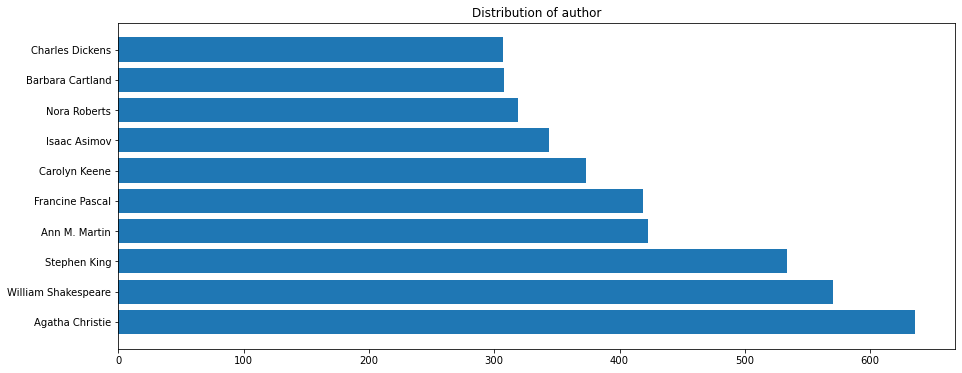

In [339]:
def univariate_plot(df, feature, plot):
    data = df[feature].value_counts(ascending=False)[:10]
    plt.figure(figsize=(15, 6))
    if plot == 'barh':
        plt.barh(y=data.index, width=data.values)
    elif plot == 'bar':
        plt.xticks(rotation = 25)
        plt.bar(x=data.index, height=data.values)
        
    plt.title(f"Distribution of {feature}")
    
univariate_plot(books_df, 'author', plot='barh')

## Data Preprocessing

#### Merging the data - Ratings and Books

In [340]:
# Confirming the common column between two dataframes
def similar_cols(df1, name1, df2, name2):
    print(f"Matching column between the {name1} and {name2} is")

    for col in df1.columns:
        if col in df2.columns:
            print(col)
            break

# Similar columns between the ratings and the books dataframes
similar_cols(ratings_df, "ratings", books_df, 'books')

Matching column between the ratings and books is
ISBN


In [341]:
# Merging the ratings with the books dataset
ratings_with_books = ratings_df.merge(right=books_df, on='ISBN')
ratings_with_books.head()

,user_id,ISBN,rating,title,author,year,publisher,Image-URL-S,Image-URL-M,img_url
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...


In [342]:
# Understanding the new data
merged_rating_books = DataUnderstading('Merged Ratings and Books', df=ratings_with_books)
merged_rating_books.understanding()

DATA UNDERSTANDING OF THE Merged Ratings and Books Dataset


SHAPE
The Merged Ratings and Books dataset contains 487,665 records and 10 columns
The columns are ['ISBN', 'Image-URL-M', 'Image-URL-S', 'author', 'img_url', 'publisher', 'rating', 'title', 'user_id', 'year']


MISSING VALUES

Missing values in the Merged Ratings and Books dataset:
0


DUPLICATES

Duplicate values in the Merged Ratings and Books dataset:
0


DATATYPES

Number of Features with [dtype('int64'), dtype('O')] datatypes are [2, 8] respectively


UNIQUE VALUES

Number of unique values in user_id are 899

Some unique values in the user_id column:
[277427   3363  11676  12538  13552]

Top 10 Sample of the Distribution of the user_id column
user_id
11676     11144
198711     6456
153662     5814
98391      5777
35859      5646
212898     4289
278418     3996
76352      3329
110973     2971
235105     2943
Name: count, dtype: int64

Number of unique values in ISBN are 178,012

Some unique values in the ISBN column:
['0

#### How many ratings does each book have?

In [343]:
num_rating = ratings_with_books.groupby('title')['rating'].count().reset_index()
num_rating.sort_values(by='rating', ascending=False)

,title,rating
154489,Wild Animus,363
18892,Bridget Jones'S Diary,277
129073,The Lovely Bones: A Novel,270
131804,The Notebook,241
132838,The Pelican Brief,236
...,...,...
92241,Practical Holiness A Second Look (Series In Pe...,1
37787,"Eine Frau, Eine Wohnung, Ein Roman",1
92239,Practical Gardening Encyclopedia,1
92238,Practical Gardener: A Guide To Breaking New Gr...,1


##### Observations
> There are some books that received less than 50 reviews. We should only focus on books with many reviews.
> Books with 1 rating would only not be sufficient enough to judge whether it was a good book.

In [344]:
# Clean the columns
num_rating.rename(columns={
    'rating': "no_of_rating"
}, inplace=True)

#### Merging the data - `ratings_with_books` with `num_ratings` table

In [345]:
# Check for similar columns
similar_cols(ratings_with_books, "ratings with books", num_rating, 'num of ratings')

Matching column between the ratings with books and num of ratings is
title


In [346]:
# Merge Datasets on 'title'
final_rating = ratings_with_books.merge(num_rating, on='title')

In [347]:
# Only keep the books with more than or equal to ratings by users
final_rating = final_rating[final_rating['no_of_rating'] >= 50]

In [348]:
complete_rating = DataUnderstading('Final Rating', final_rating)
complete_rating.understanding()

DATA UNDERSTANDING OF THE Final Rating Dataset


SHAPE
The Final Rating dataset contains 63,336 records and 11 columns
The columns are ['ISBN', 'Image-URL-M', 'Image-URL-S', 'author', 'img_url', 'no_of_rating', 'publisher', 'rating', 'title', 'user_id', 'year']


MISSING VALUES

Missing values in the Final Rating dataset:
0


DUPLICATES

Duplicate values in the Final Rating dataset:
0


DATATYPES

Number of Features with [dtype('int64'), dtype('O')] datatypes are [3, 8] respectively


UNIQUE VALUES

Number of unique values in user_id are 888

Some unique values in the user_id column:
[277427   3363  11676  12538  13552]

Top 10 Sample of the Distribution of the user_id column
user_id
11676     1028
35859      462
76352      415
16795      396
153662     379
102967     345
230522     340
78783      331
185233     329
55492      320
Name: count, dtype: int64

Number of unique values in ISBN are 2,444

Some unique values in the ISBN column:
['002542730X' '002542730x' '0060930535' '0060934

## Modelling

### Preprocessing

#### Creating a pivot table off the final_rating dataset

In [349]:
# Pivot Table
book_pivot = final_rating.pivot_table(index='title', columns='user_id', values='rating')

# Cleaning the NaN values
book_pivot.fillna(value=0, inplace=True)

# Visualise
book_pivot

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1St To Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2Nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year Of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen And The Art Of Motorcycle Maintenance: An Inquiry Into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Create a sparse matrix

In [350]:
book_sparse = csr_matrix(book_pivot)

# Confirming sparse matrix was created
type(book_sparse)

scipy.sparse._csr.csr_matrix

#### Create a pivot table based on the authors

In [351]:
# Pivot Table
author_pivot = final_rating.pivot_table(index='author', columns='user_id', values='rating')

# Cleaning the NaN values
author_pivot.fillna(value=0, inplace=True)

# Visualise
print(author_pivot.head(2))

# Create a sparse matrix
author_sparse = csr_matrix(author_pivot)

# Confirmation
type(author_sparse)

# Length
len(author_pivot)

user_id           254     2276    2766    2977    3363    3757    4017    \
author                                                                     
A. Manette Ansay     0.0     0.0     0.0     0.0     0.0     0.0     9.0   
A.S. Byatt           0.0     0.0     0.0     0.0     0.0     0.0     0.0   

user_id           4385    6242    6251    ...  274004  274061  274301  274308  \
author                                    ...                                   
A. Manette Ansay     0.0     0.0     0.0  ...     0.0     0.0     0.0     0.0   
A.S. Byatt           0.0     0.0     0.0  ...     0.0     0.0     0.0     0.0   

user_id           274808  275970  277427  277478  277639  278418  
author                                                            
A. Manette Ansay     0.0     0.0     0.0     0.0     0.0     0.0  
A.S. Byatt           0.0     0.0     0.0     0.0     0.0     0.0  

[2 rows x 888 columns]


577

In [352]:
author_pivot.iloc[100,:].name, book_pivot.iloc[237,:].name

('Clancy Tom', 'Guilty Pleasures (Anita Blake Vampire Hunter (Paperback))')

### Nearest Neighbors Model

In [353]:
# Instantiation
model = NearestNeighbors(algorithm='brute')

# Fitting
model.fit(book_sparse)

# Prediction
test_record = book_pivot.iloc[237, :].values.reshape(1, -1)
distance, suggestion = model.kneighbors(test_record, n_neighbors=6)

In [354]:
# Get the distance
distance

array([[ 0.        , 37.15171598, 37.54996671, 38.18376618, 38.32753579,
        38.58756276]])

##### Observations
> The first item is 0 meaning the model is comparing the datapoint `test_record` with itself. 
> The rest of the values are the 6 closest distances available.

In [355]:
# The suggested indexes
suggestion # array([[237, 240, 238, 241, 184, 291]], dtype=int64)

# Book values
for idx in suggestion:
    print(book_pivot.index[idx])

Index(['Guilty Pleasures (Anita Blake Vampire Hunter (Paperback))',
       'A Civil Action', 'Fatal Cure', 'Nothing Lasts Forever',
       'No Safe Place', 'Jacob Have I Loved'],
      dtype='object', name='title')


#### Modelling for the Authors

In [356]:
# Instantiation
author_model = NearestNeighbors(algorithm='brute')

# Fit
author_model.fit(author_sparse)

# Test Record
test_record = author_pivot.iloc[10, :].values.reshape(1, -1)

# Prediction
distance, suggestion = author_model.kneighbors(test_record, n_neighbors=6)

print(suggestion)

# Authors
for idx in suggestion:
    print(author_pivot.index[idx])
    
# Distance
distance

[[ 10 447 207 175 290  43]]
Index(['Alice Walker', 'Patricia Springer', 'Harold Coyle', 'Fay Weldon',
       'John Steinbeck', 'Barbara Cartland'],
      dtype='object', name='author')


array([[ 0.        , 54.0138871 , 54.18948237, 54.34611302, 54.39209501,
        54.39209501]])

## Saving the model

In [357]:
# # Get all the book names 
# book_names = book_pivot.index

# # Save all the author names
# author_names = author_pivot.index

# # Store the models in a pickle
# pickle.dump(model, open('models/book_model.pkl', 'wb'))
# pickle.dump(author_model, open('models/author_model.pkl', 'wb'))

# # Save the names of the books
# pickle.dump(book_names, open('models/book_names.pkl', 'wb'))
# pickle.dump(author_names, open('models/author_names.pkl', 'wb'))

# # Save the final ratings df
# pickle.dump(final_rating, open('models/final_rating.pkl', 'wb'))

# # Save the names of the books
# pickle.dump(book_pivot, open('models/book_pivot.pkl', 'wb'))
# pickle.dump(author_pivot, open('models/author_pivot.pkl', 'wb'))

## Recommendation

### Testing the recommendation function

In [358]:
def get_book_details(book_title):
    """Get the ISBN, author and Image URL given an exact title"""
    return final_rating[final_rating['title'] == book_title].sort_values(by='year', ascending=False)\
            .iloc[0,:][['ISBN', 'author', 'img_url']]

def get_top_author_books(author):
    """Get the author's top rated works given an exact name"""
    books =  final_rating[final_rating['author'] == author]\
                .sort_values(by='rating', ascending=False)['title'].unique()[:5]
    
    for j in books:
        print(' -',j)
    

# Book Recommender Function
def recommend_book(book_name):
    """This function takes in a book name and returns 6 suggestions"""
    # Get the book id from the book pivot table 
    book_id = np.where(book_pivot.index == book_name)[0][0]
    
    # Get the row of records from the book id
    record = book_pivot.iloc[book_id, :].values.reshape(1, -1)
    
    # Get the distance and suggestion from the book model
    distance, suggestion = model.kneighbors(record, n_neighbors=6)
    
    # Get all the books from the suggestion
    for idx in range(len(suggestion)):
        
        # Returns a list of type index
        books = book_pivot.index[suggestion[idx]]
        
        # Returns each individual item in the list
        for j in books:
            print(j)
            print("Book Details")
            print(get_book_details(j))
            print("")
            
# Book Recommender Function
def recommend_author(author_name):
    """This function takes in a book name and returns 6 suggestions"""
    # Get the book id from the book pivot table 
    author_id = np.where(author_pivot.index == author_name)[0][0]
    
    # Get the row of records from the book id
    record = author_pivot.iloc[author_id, :].values.reshape(1, -1)
    
    # Get the distance and suggestion from the book model
    distance, suggestion = author_model.kneighbors(record, n_neighbors=6)
    
    # Get all the books from the suggestion
    for idx in range(len(suggestion)):
        
        # Returns a list of type index
        authors = author_pivot.index[suggestion[idx]]
        
        # Returns each individual item in the list
        for j in authors:
            print(j)
            print(f'Highly rated books by {j} include')
            get_top_author_books(j)
            print("")

In [359]:
# Testing Book Recommendation
recommend_book('Jacob Have I Loved')

Jacob Have I Loved
Book Details
ISBN                                              0064403688
author                                    Katherine Paterson
img_url    http://images.amazon.com/images/P/0064403688.0...
Name: 104814, dtype: object

Exclusive
Book Details
ISBN                                              0446604232
author                                          Sandra Brown
img_url    http://images.amazon.com/images/P/0446604232.0...
Name: 98507, dtype: object

No Safe Place
Book Details
ISBN                                              0345404777
author                               Richard North Patterson
img_url    http://images.amazon.com/images/P/0345404777.0...
Name: 3113, dtype: object

Legacy
Book Details
ISBN                                              0373834969
author                                      Jayne Ann Krentz
img_url    http://images.amazon.com/images/P/0373834969.0...
Name: 29425, dtype: object

Pleading Guilty
Book Details
ISBN                     

In [360]:
# Testing Author Recommendation
recommend_author("Mary Higgins Clark")

Mary Higgins Clark
Highly rated books by Mary Higgins Clark include
 - Loves Music, Loves To Dance
 - Stillwatch
 - While My Pretty One Sleeps
 - Moonlight Becomes You
 - On The Street Where You Live

Golden Books
Highly rated books by Golden Books include
 - Jurassic Park

W. E. B. Griffin
Highly rated books by W. E. B. Griffin include
 - The Witness

Debra Dier
Highly rated books by Debra Dier include
 - Dangerous

Susan Grant
Highly rated books by Susan Grant include
 - Contact

Sharon K. Garner
Highly rated books by Sharon K. Garner include
 - Sanctuary



In [361]:
get_top_author_books('Mary Higgins Clark')

 - Loves Music, Loves To Dance
 - Stillwatch
 - While My Pretty One Sleeps
 - Moonlight Becomes You
 - On The Street Where You Live


In [366]:
get_book_details("On The Street Where You Live")

ISBN                                              0671004530
author                                    Mary Higgins Clark
img_url    http://images.amazon.com/images/P/0671004530.0...
Name: 117258, dtype: object

## Classes and Functions

In [368]:
class BookDetails():
    def __init__(self, book_idx=None, name=None):

        if name == None and book_idx != None:
            book_title = book_pivot.index[book_idx]
            self.df_idx = np.where(final_rating['title'] == book_title)[0][0]
        else:
            self.df_idx = np.where(final_rating['title'] == name)[0][0]

    def fetch_book(self):
        # Find the location of the book in the main df
        # Book
        return final_rating.iloc[self.df_idx]['title']

    def fetch_poster(self):
        # URLs
        return final_rating.iloc[self.df_idx]['img_url']

    def fetch_author(self):
        # URLs
        return final_rating.iloc[self.df_idx]['author']
    
class AuthorsDetails():
    def __init__(self, author_id=None, author=None):

        if author_id == None and author != None:
            self.df_idx = np.where(final_rating['author'] == author)[0][0]
        else:
            author_name = author_pivot.index[author_id]
            self.df_idx = np.where(final_rating['author'] == author_name)[0][0]

    def fetch_author(self):
        # Find the location of the book in the main df
        return final_rating.iloc[self.df_idx]['author']

    def fetch_top_rated(self):
        # Top Rated Books
        book = final_rating.iloc[self.df_idx]['title']
        return book
    
    def fetch_top_poster(self):
        poster = final_rating.iloc[self.df_idx]['img_url']
        return poster

def recommend_books(book_name):
    """This function takes a booklist of name and returns other book suggestions"""
    # Obtain the book ID
    book_id = np.where(book_pivot.index == book_name)[0][0]

    # Obtain the whole record
    record = book_pivot.iloc[book_id, :].values.reshape(1, -1)

    # Distances and suggestions
    distance, suggestion = model.kneighbors(record, n_neighbors=6)

    # Empty book list to store the books
    book_list, poster_url, authors= [], [], []

    for idx in suggestion[0]:
        book = BookDetails(idx)
        book_list.append(book.fetch_book())
        poster_url.append(book.fetch_poster())
        authors.append(book.fetch_author())

    return book_list, poster_url, authors

def recommended_author(author_name):
    """This function takes a booklist of name and returns other book suggestions"""
    # Obtain the book ID
    idx = np.where(author_pivot.index == author_name)[0][0]

    # Obtain the whole record
    record = author_pivot.iloc[idx, :].values.reshape(1, -1)

    # Distances and suggestions
    distance, suggestion = author_model.kneighbors(record, n_neighbors=6)

    # Empty book list to store the books
    authors, top_rated, details = [], [], []

    for idx in suggestion[0]:
        author = AuthorsDetails(idx)
        authors.append(author.fetch_author())
        top_rated.append(author.fetch_top_rated())
        details.append(author.fetch_top_poster())

    return authors, top_rated, details

# Tests
recommend_books('1984')

recommended_author('Mary Higgins Clark')

(['Mary Higgins Clark',
  'Golden Books',
  'W. E. B. Griffin',
  'Debra Dier',
  'Susan Grant',
  'Sharon K. Garner'],
 ["I'Ll Be Seeing You",
  'Jurassic Park',
  'The Witness',
  'Dangerous',
  'Contact',
  'Sanctuary'],
 ['http://images.amazon.com/images/P/0671888587.01.LZZZZZZZ.jpg',
  'http://images.amazon.com/images/P/030703979X.01.LZZZZZZZ.jpg',
  'http://images.amazon.com/images/P/0515107476.01.LZZZZZZZ.jpg',
  'http://images.amazon.com/images/P/0843950382.01.LZZZZZZZ.jpg',
  'http://images.amazon.com/images/P/0505524996.01.LZZZZZZZ.jpg',
  'http://images.amazon.com/images/P/1594140979.01.LZZZZZZZ.jpg'])